In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#load data

train_data = pd.read_csv("D:\\EIC-Code\\00-Python\\Machine-Learning-HW\\LinearRegression\\concrete\\concrete\\test.csv", header=None,
names = ['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr', 'Fine Aggr','y']) #y is SLUMP

test_data = pd.read_csv("D:\\EIC-Code\\00-Python\\Machine-Learning-HW\\LinearRegression\\concrete\\concrete\\test.csv", header=None, 
names = ['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr', 'Fine Aggr','y'])

features = ['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr', 'Fine Aggr']

In [137]:
# Define the cost function (Mean Squared Error)
def compute_cost(X, y, w):
    m = len(y)
    predictions = X.dot(w)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Define the gradient of the cost function
def compute_gradient(X, y, w):
    m = len(y)
    gradient = (1 / m) * X.T.dot(X.dot(w) - y)
    return gradient

Convergence reached at iteration 418


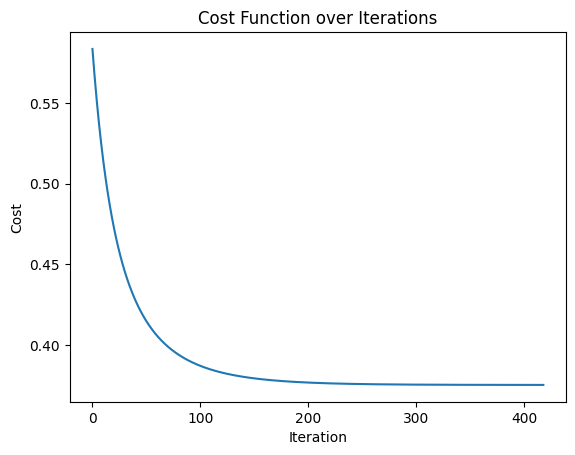

Final weights: [ 0.0029179   0.03367091 -0.14397489 -0.0094888   0.18529378 -0.12541392
 -0.10135881  0.13228044]
Final learning rate: 2.4918852060516293e-06
Cost on test data: 0.3751743653476598


In [150]:
# Batch Gradient Descent implementation
def batch_gradient_descent(X, y, r, tolerance=1e-6, decay_rate = 0.01, max_iters=1000):
    m, n = X.shape
    w = np.zeros(n)  # Initialize weights to zeros
    cost_history = []
    r_history = []
    w_diff = np.inf  # Set initial weight difference to infinity
    
    for t in range(max_iters):
        # Compute the current cost
        cost = compute_cost(X, y, w)
        cost_history.append(cost)
        
        # Compute the gradient
        grad = compute_gradient(X, y, w)

        # Update weights
        w_new = w - r * grad
        
        # Calculate the difference in weights
        w_diff = np.linalg.norm(w_new - w)
        
        # Update weights for the next iteration
        w = w_new

        #update learning rate
        r = r / (1 + decay_rate * 2)
        r_history.append(r)

        # Monitor learning rate and convergence
        if w_diff < tolerance:
            print(f"Convergence reached at iteration {t}")
            break
    
    return w, cost_history, r_history

# Set up data (replace this with your actual data)
X_train = train_data[features].values
y_train = train_data['y'].values

# Add bias term to the features
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Run the batch gradient descent algorithm
learning_rate = 0.01  # Start with r = 0.01
weights, cost_history, r_history = batch_gradient_descent(X_train_bias, y_train, r=learning_rate)

# Plot the cost function over iterations
plt.plot(cost_history)
plt.title("Cost Function over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# After convergence, print the final weight vector and the final learning rate
print(f"Final weights: {weights}")
print(f"Final learning rate: {r_history[-1]}")

# Use the final weight vector to compute the cost function value on the test data
X_test = test_data[features].values
y_test = test_data['y'].values
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

test_cost = compute_cost(X_test_bias, y_test, weights)
print(f"Cost on test data: {test_cost}")

Convergence reached at iteration 374


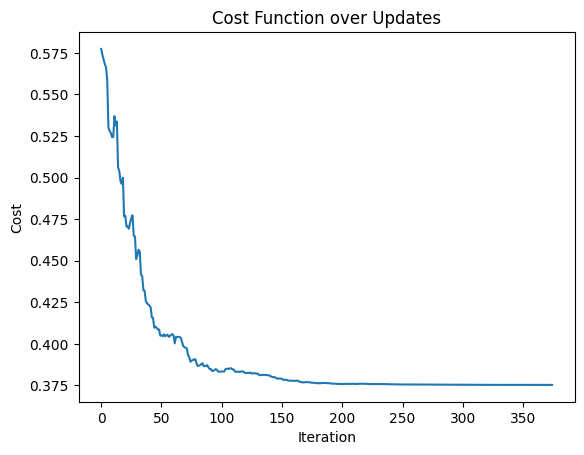

final weights: [ 0.01190385  0.08313987 -0.18913933  0.00127107  0.17890333 -0.12511006
 -0.09682275  0.11433049]
final learning_rate: 0.3753049233581554
final cost on training data: 2.4918852060516293e-06
Cost on test data: 0.3753049233581554


In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function (Mean Squared Error)
def compute_cost(X, y, w):
    m = len(y)
    predictions = X.dot(w)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Function to compute gradient for a single sample
def compute_single_gradient(Xi, yi, w):
    prediction = np.dot(Xi, w)
    error = yi - prediction
    gradient = -error * Xi  # Gradient for one sample
    return gradient

# Stochastic Gradient Descent (SGD) implementation
def stochastic_gradient_descent(X, y, r, max_iters=1000, decay_rate = 0.01, tolerance=1e-6):
    m, n = X.shape
    w = np.zeros(n)  # Initialize weights to zero
    cost_history = []
    r_history =[ ]
    w_diff = np.inf  # Set initial weight difference to infinity
    
    for t in range(max_iters):
        # Randomly sample an index
        i = np.random.randint(m)
        
        # Get the randomly selected sample
        Xi = X[i]
        yi = y[i]
        
        # Compute gradient for this sample
        dw = compute_single_gradient(Xi, yi, w)

        # Update weights
        w_new = w - r * dw

        # Calculate weight difference
        w_diff = np.linalg.norm(w_new - w)
        w = w_new  # Update weights for next iteration

        # Compute and store the cost function (on the whole dataset) after each update
        cost = compute_cost(X, y, w)
        cost_history.append(cost)

        #update learning rate
        r = r / (1 + decay_rate * 2)
        r_history.append(r)
        
        # Check for convergence
        if w_diff < tolerance:
            print(f"Convergence reached at iteration {t}")
            break
    
    return w, cost_history

# Example Data
# Replace this with your actual data
X_train = train_data[features].values
y_train = train_data['y'].values

# Add bias term to the features (intercept)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Run the Stochastic Gradient Descent algorithm
learning_rate = 0.01  # You can adjust the learning rate as needed
weights, cost_history = stochastic_gradient_descent(X_train_bias, y_train, r=learning_rate)

# Plot the cost function over iterations
plt.plot(cost_history)
plt.title("Cost Function over Updates")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# After convergence, print the final weight vector and the final cost
print(f"final weights: {weights}")
print(f"final learning_rate: {cost_history[-1]}")
print(f"final cost on training data: {r_history[-1]}")

# Use the final weights to compute the cost on the test data
X_test = test_data[features].values
y_test = test_data['y'].values
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
test_cost = compute_cost(X_test_bias, y_test, weights)
print(f"Cost on test data: {test_cost}")

In [151]:
import numpy as np

X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Analytical solution for the optimal weight vector w*
def analytical_solution(X, y):
    w_star = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w_star

# Compute optimal weights using analytic approach 
optimal_weights = analytical_solution(X_train_bias, y_train)

In [153]:
optimal_weights

array([ 0.03833292, -1.05154506, -1.38454837, -1.0843673 , -0.34476282,
       -0.24711868, -1.36924673, -0.65715817])